In [1]:
import datetime

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import tensorflow as tf

import auxiliaries as aux

In [2]:
species = 'Deer'
file_name = 'GSM02927'
temperature_window = aux.TemperatureWindow(input_width=aux.OUT_STEPS,
                               label_width=aux.OUT_STEPS,
                               shift=aux.OUT_STEPS,
                               cv_name=f'{species}/{file_name}')

In [3]:
autoregressive_model = aux.FeedBack(units=32, out_steps=aux.OUT_STEPS, num_vars=1)
history = aux.compile_and_fit(autoregressive_model, temperature_window)

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 85s 355ms/step - loss: 0.7531 - mean_absolute_error: 0.7125 - mean_squared_error: 0.7531 - val_loss: 0.9480 - val_mean_absolute_error: 0.7885 - val_mean_squared_error: 0.9480
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - loss: 0.4621 - mean_absolute_error: 0.5511 - mean_squared_error: 0.4621 - val_loss: 0.7036 - val_mean_absolute_error: 0.6706 - val_mean_squared_error: 0.7036
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - loss: 0.4387 - mean_absolute_error: 0.5383 - mean_squared_error: 0.4387 - val_loss: 0.7206 - val_mean_absolute_error: 0.6785 - val_mean_squared_error: 0.7206
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - loss: 0.4312 - mean_absolute_error: 0.5340 - mean_squared_error: 0.4312 - val_loss: 0.8055 - val_mean_absolute_error: 0.7203 - val_mean_squared_error: 0.8055


In [4]:
next(iter(temperature_window.test))

(<tf.Tensor: shape=(32, 100, 1), dtype=float32, numpy=
 array([[[-1.5991092 ],
         [-0.85059   ],
         [-1.4119793 ],
         ...,
         [-0.85059   ],
         [-0.6634602 ],
         [-0.6634602 ]],
 
        [[-1.0377197 ],
         [-0.10207079],
         [-0.6634602 ],
         ...,
         [ 0.08505899],
         [-0.28920057],
         [-1.4119793 ]],
 
        [[-0.47633037],
         [-0.6634602 ],
         [-1.9733688 ],
         ...,
         [-0.10207079],
         [-0.85059   ],
         [-0.85059   ]],
 
        ...,
 
        [[-1.0377197 ],
         [-0.47633037],
         [-1.0377197 ],
         ...,
         [-1.2248496 ],
         [-1.2248496 ],
         [-0.85059   ]],
 
        [[-0.85059   ],
         [-1.2248496 ],
         [-0.6634602 ],
         ...,
         [-1.2248496 ],
         [-1.0377197 ],
         [-0.85059   ]],
 
        [[-0.6634602 ],
         [ 0.6464484 ],
         [ 0.08505899],
         ...,
         [-0.28920057],
         [-0.28

In [5]:
autoregressive_model.evaluate(temperature_window.test, verbose=1, return_dict=True)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.5295 - mean_absolute_error: 0.5591 - mean_squared_error: 0.5295


{'loss': 0.53132164478302,
 'mean_absolute_error': 0.559174656867981,
 'mean_squared_error': 0.5313217043876648}

In [11]:
df = temperature_window.create_df_extension(species, autoregressive_model, 20)

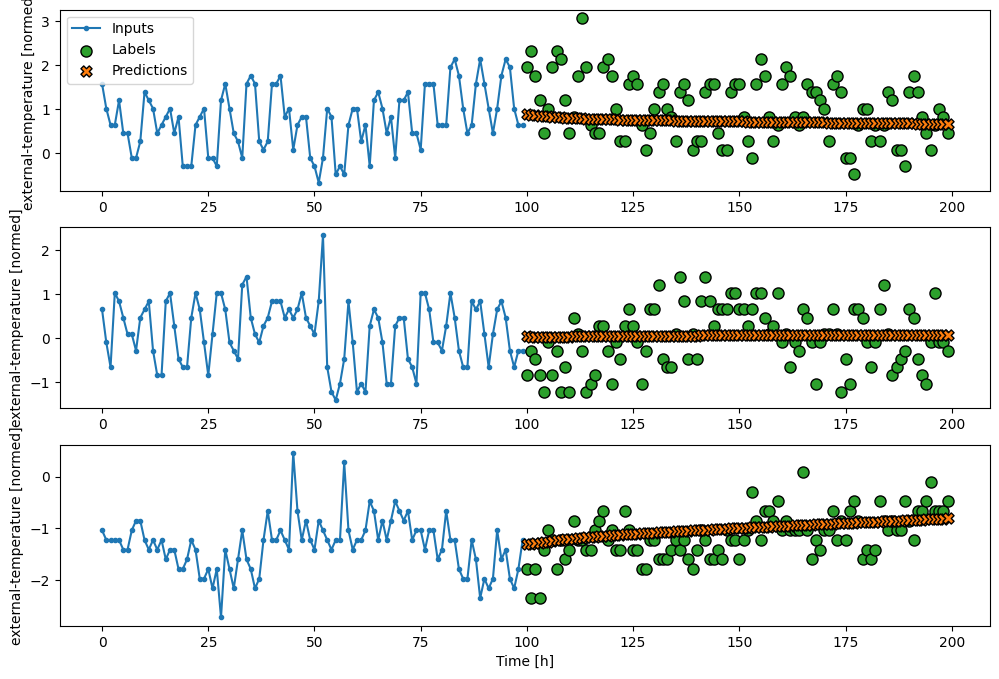

In [8]:
temperature_window.plot(autoregressive_model)

In [13]:
df[df['modeled'] == True]

,external-temperature,modeled
timestamp,,
2008-03-15 12:01:37,14.352880,True
2008-03-15 16:01:37,14.361412,True
2008-03-15 20:01:37,14.369326,True
2008-03-16 00:01:37,14.388363,True
2008-03-16 04:01:37,14.412871,True
...,...,...
2008-06-06 00:01:37,17.075175,True
2008-06-06 04:01:37,17.075902,True
2008-06-06 08:01:37,17.076625,True


In [10]:
for i in range(aux.OUT_STEPS):
    print(df[df['modeled'] == True].iloc[i, 0])

14.352880464985699
14.36141155444523
14.369326147791524
14.388362834282773
14.412870744611325
14.439719301640025
14.46714008045505
14.494178157084562
14.520358936225684
14.545489713074225
14.569534494832046
14.59254169659045
14.614598911442249
14.635811728879323
14.656285101352886
14.67611872572857
14.695400672879696
14.7142097765898
14.732612926129756
14.750667455160313
14.768420504691424
14.785911252724599
14.80317266611477
14.820230863529616
14.83710814139276
14.853821540542256
14.870385872173802
14.886812443759379
14.90310937756759
14.919285432907719
14.935345865365333
14.951294656444652
14.967136265430403
14.98287228492427
14.998506377910136
15.014039340688845
15.029472765862083
15.044806812690021
15.06004243673367
15.07518075281421
15.09022112389097
15.105164664785129
15.120010101415335
15.134758867123109
15.149410484127944
15.163964793169674
15.178422112768631
15.192782283664652
15.207045305857733
15.221210860827536
15.23527918746432
15.249250365398163
15.263124553889236
15.2769